![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

In [1]:
import tensorflow as tf
tf.__version__
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from glob import glob
import os
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset_path = 'Train-20210114T110605Z-001/Train'
number_of_classes = 15

### Initialize ImageDataGenerator (7 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

### ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None,
    validation_split=0.25, dtype=None
)

In [4]:
IMG_SIZE = 28

In [5]:
# using rescale to image value range :[0,1]
# Training :validation = 75: 25
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
 rescale=1.0/255.0,
 validation_split=0.25
)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [6]:
train_generator = image_datagen.flow_from_directory(
        directory = dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        classes= ['0','1','2','3','4','5','6','7','8','9','11','12','13','14','15'],
        class_mode = 'categorical',
        color_mode="rgb",
        subset='training',
        shuffle=True,
        seed =1
        )

Found 16248 images belonging to 15 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [7]:
validation_generator = image_datagen.flow_from_directory(
        directory = dataset_path,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        classes= ['0','1','2','3','4','5','6','7','8','9','11','12','13','14','15'],
        class_mode = 'categorical',
        color_mode="rgb",
        subset='validation',
        shuffle=True,
        seed =1
        )

Found 5412 images belonging to 15 classes.


## Visualize few images before giving to model

In [8]:
x_batch, y_batch = next(train_generator)

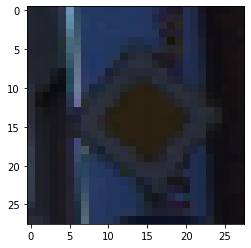

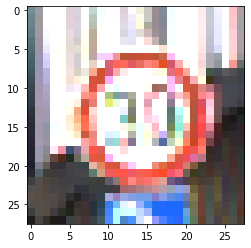

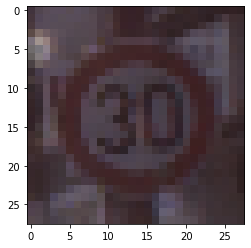

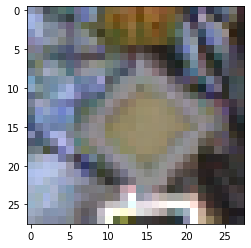

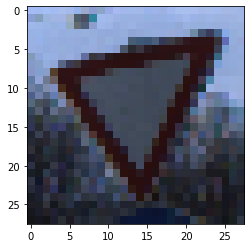

In [9]:
#Visualize dataset[first 5 images] from first batch of train_generator
import matplotlib.pyplot as plt
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image.astype(np.float32))
    plt.show()

In [10]:
for image_batch, labels_batch in validation_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32, 15)


### Define model (10 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

In [12]:
def myownmodel_10layers():
    model = Sequential()
    model.add(Conv2D(input_shape=(IMG_SIZE,IMG_SIZE,3),filters=64,kernel_size=(3,3),padding="same", activation="relu", name = 'conv1'))
    model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu", name = 'conv2'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", name = 'conv3'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name = 'pool1'))
    # # Apply Dropout with 0.2 probability 
    model.add(Dropout(rate=0.2))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", name = 'conv4'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name = 'pool2'))
    # # Apply Dropout with 0.2 probability
    model.add(Dropout(rate=0.2))
    model.add(Flatten(name='flatten'))
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dense(number_of_classes, activation='softmax', name='output'))
    return model

### Create Model with above definition

In [13]:
model=myownmodel_10layers()

### Compile the model (5 Marks)
- Specify optimizer, loss & metrics

### chosen categorical crossentropy for multi class classification problem

In [14]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

### Get model summary (3 Marks)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 64)        1792      
_________________________________________________________________
conv2 (Conv2D)               (None, 26, 26, 64)        36928     
_________________________________________________________________
conv3 (Conv2D)               (None, 24, 24, 128)       73856     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 256)       295168    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 256)         0

### Fit the model (5 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

### calculate number of iterations per epoch

In [16]:
# steps_per_epoch = int(total train images / 32)
steps_per_epoch = len(train_generator)
steps_per_epoch

508

In [17]:
# valsteps = int(5757 / 32) #total validation image =5412  
val_steps = len(validation_generator)
val_steps

170

In [18]:
# Use earlystopping
earlyStoppingcallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

In [19]:
trafficmodel = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=val_steps,
        callbacks=[earlyStoppingcallback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 508 steps, validate for 170 steps
Epoch 1/10
508/508 [==============================] - 107s 210ms/step - loss: 0.6564 - accuracy: 0.7931 - val_loss: 0.2090 - val_accuracy: 0.9392
Epoch 2/10
508/508 [==============================] - 111s 219ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.1970 - val_accuracy: 0.9396
Epoch 3/10
508/508 [==============================] - 115s 225ms/step - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.1541 - val_accuracy: 0.9575
Epoch 4/10
508/508 [==============================] - 114s 224ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.1842 - val_accuracy: 0.9534
Epoch 5/10
508/508 [==============================] - 113s 221ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.1070 - val_accuracy: 0.9706
Epoch 6/10
508/508 [==============================] - 123s 242ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.1609 - val_accuracy: 0.9586
Epoch 7/10
508/508 [==========

In [20]:
#Set the path where you want to store the model and weights 
model.save('traffic_model.h5')
model.save_weights('traffic_model_weights.h5')

In [21]:
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
Test Accuracy: 96.508


## Getting accuracy of around 96.5% on validation set

### Draw plots (5 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

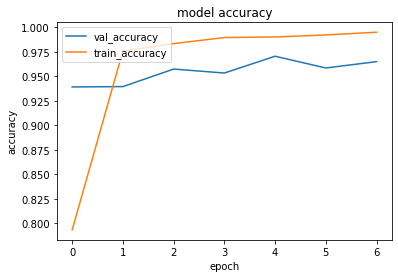

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(trafficmodel.history['val_accuracy'],label = "val_accuracy")
plt.plot(trafficmodel.history['accuracy'],label = "train_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'train_accuracy'], loc='upper left')
plt.show()

## As you can see train accuracy in red colour is low at the starting but after 1 epoch it shoots to 98% and validation accuracy is also around 97% at the end of 4 epoch runs

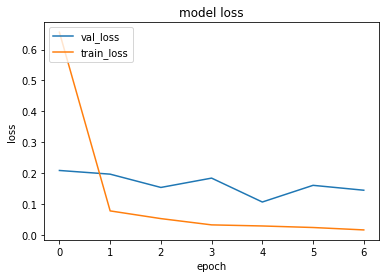

In [23]:
# summarize history for loss
plt.plot(trafficmodel.history['val_loss'])
plt.plot(trafficmodel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val_loss', 'train_loss'], loc='upper left')
plt.show()

## Conclusion:

## As you can see training loss is high at 0.61 when training starts but after 1 epoch it reduces to 0.05 and validation loss is also around 0.12 at the end of all epoch runs